# 1. Linear Regression
### 공부시간에 따른 시험 점수

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset=pd.read_csv("LinearRegressionData.csv")

In [23]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [24]:
#dataset.iloc[low,col]
# X는 독립변수이므로 -1 즉 스코어 전까지(독립 변수-원인)
X=dataset.iloc[:,:-1].values
# 마지막 컬럼데이터 (종속 변수 -결과)
Y=dataset.iloc[:,-1].values

In [25]:
X,Y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [27]:
# linear_modeln import LinearRegressionfrom sklearn.
from sklearn.linear_model import LinearRegression
reg=LinearRegression() #객체생성
reg.fit(X,Y) #학습 [모델 생성]

LinearRegression()

In [28]:
y_pred=reg.predict(X)# X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

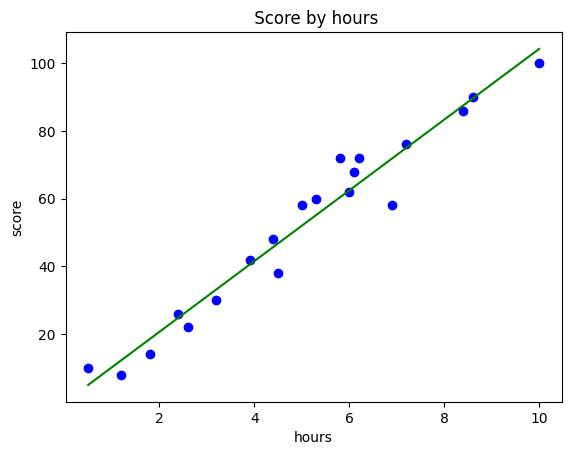

In [30]:
plt.scatter(X,Y,color='blue') # 산점도
plt.plot(X,y_pred,color='green')# 선그래프
plt.title(' Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [31]:
print('9시간 공부했을떄 예상점수:',reg.predict([[9]]))

9시간 공부했을떄 예상점수: [93.77478776]


In [32]:
reg.coef_ #기울기

array([10.44369694])

In [34]:
reg.intercept_#y절편
# 수식 y=10.4436x-0.2184

-0.218484702867201